<a href="https://colab.research.google.com/github/Jeremy-Alekai/Ecommerce-Item-Purchase-Prediction/blob/main/Ecommerce_Item_Purchase_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUCTIONS**

Source: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

**Source of data:**

This dataset is sourced from the UCI Machine Learning Repository, a public repository of machine learning datasets.


**Brief description of data:**

This dataset contains information on online shoppers' purchasing behavior, including various features such as the type of product, whether the user is a returning visitor, the time of day and week, the duration of the session, and various page views and interactions.

**What is the target?**

The target could be to predict whether an online shopper is likely to make a purchase or not based on various features such as product type, user behavior, and session duration.


**Is this a classification or regression problem?** 

This is a classification problem.

**How many features?** 

There are several features including the type of product, whether the user is a returning visitor, the time of day and week, the duration of the session, and various page views and interactions.

**How many rows of data?** 

The dataset contains 12330 rows of data.

**What, if any, challenges do you foresee in cleaning, exploring, or modeling with this dataset?**

Some challenges that could be encountered include missing values, inconsistent data formats, and outliers in the data. Additionally, the dataset contains a large number of categorical features, which may need to be appropriately encoded for modeling purposes.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:

filename = '/content/drive/MyDrive/Colab Notebooks/Coding Dojo/Project 2/online_shoppers_intention.csv'
df = pd.read_csv(filename)

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.shape
# Row 12330 # columns 18

(12330, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
df.duplicated().sum()

125

In [9]:
df=df.drop_duplicates()

In [10]:
df.duplicated().sum()


0

In [11]:
# # Drop unnecessary columns
# df = df.drop(['Informational', 'Informational_Duration',
#               'ProductRelated_Duration', 'ExitRates', 'SpecialDay'], axis=1)

In [12]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [13]:
# Address inconsistencies in categorical data
df.loc[:, 'Month'] = df['Month'].str.capitalize() # capitalize the first letter of each month name

# Address inconsistencies in 'Month' column
df.loc[:, 'Month'] = df['Month'].replace({'June':'Jun'})

<ipython-input-13-e6e6fe84e159>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Month'] = df['Month'].str.capitalize() # capitalize the first letter of each month name
<ipython-input-13-e6e6fe84e159>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Month'] = df['Month'].replace({'June':'Jun'})


In [14]:
df['Month'].value_counts()

May    3329
Nov    2982
Mar    1860
Dec    1706
Oct     549
Sep     448
Aug     433
Jul     432
Jun     285
Feb     181
Name: Month, dtype: int64

In [15]:
# Number of months in the data set
print(f"there are {df['Month'].value_counts().count()} Months registered in the dataset.")

there are 10 Months registered in the dataset.


In [16]:
# checking inconsistencies in categorical data
df['VisitorType'].value_counts()

Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: VisitorType, dtype: int64

In [17]:
# The code calculates descriptive statistics of the numerical features in the dataset,
#  transposes the resulting table for easier readability, and displays the statistics.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12205.0,2.338878,3.330436,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12205.0,81.646331,177.491845,0.0,0.000000,9.000000,94.700000,3398.750000
Informational,12205.0,0.508726,1.275617,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12205.0,34.825454,141.424807,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12205.0,32.045637,44.593649,0.0,8.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12205.0,1206.982457,1919.601400,0.0,193.000000,608.942857,1477.154762,63973.522230
BounceRates,12205.0,0.020370,0.045255,0.0,0.000000,0.002899,0.016667,0.200000
ExitRates,12205.0,0.041466,0.046163,0.0,0.014231,0.025000,0.048529,0.200000
PageValues,12205.0,5.949574,18.653671,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12205.0,0.061942,0.199666,0.0,0.000000,0.000000,0.000000,1.000000


**Visualization**

In [18]:
#Libraries used
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# # the for loop iterates through each bar in the countplot and retrieves the height of the bar using p.get_height().
# #  The annotate function is used to add text labels above each bar using the x and y coordinates. 
# # The '{:.0f}'.format() function is used to format the count values as integers without any decimal places.
#  round() function to round off


def plot_categorical_data(df, col, hue=None, figsize=(10,6)):
    
    fig, ax = plt.subplots(figsize=figsize)
    
    sns.countplot(x=col, hue=hue, data=df, ax=ax)
    
    # Annotate bars with count values
    for p in ax.patches:
        count = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + count
        ax.annotate(f'{count}\n{count/len(df)*100:.2f}%', (x, y), ha='center', fontsize=12)
    
    # Show percentage share
    if hue:
        share = df.groupby(col)[hue].value_counts(normalize=True).mul(100).round(2)
    else:
        share = df[col].value_counts(normalize=True).mul(100).round(2)
    
    # Set plot aesthetics
    sns.despine(left=True)
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel('Count')
    ax.legend(title=hue)
    plt.show()


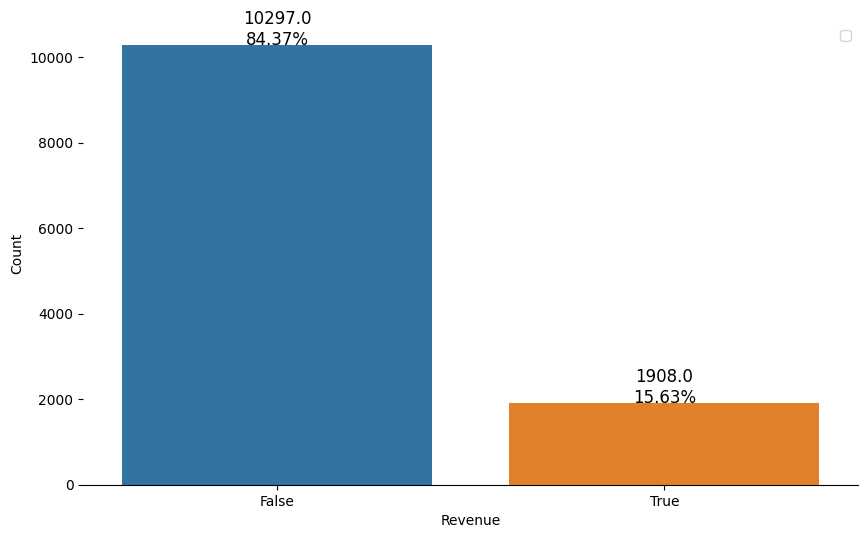

In [20]:
# The chart provides a quick visualization of the distribution of the "Revenue" column in the dataset.
# 
plot_categorical_data(df, 'Revenue', hue=None)

Only 15.63% people ended up making 1 or more purchase

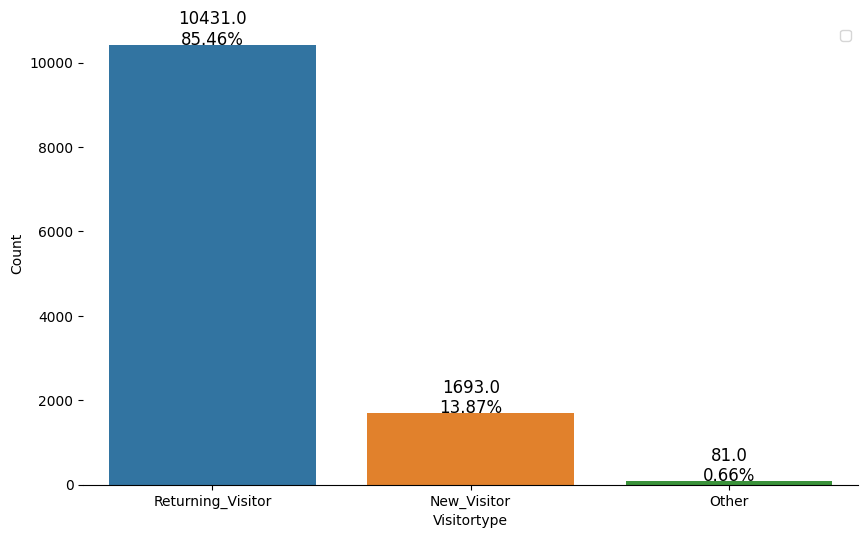

In [21]:
plot_categorical_data(df, 'VisitorType', hue=None)

85% of customers return back to site, which is a good indication. Meaning that customers are satisfied with what they are getting. 13.74% of customers are new customers

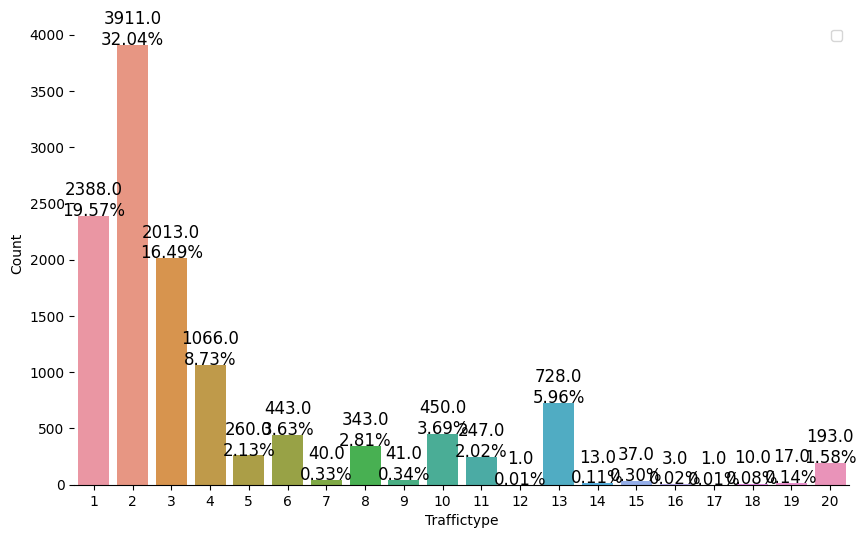

In [22]:
plot_categorical_data(df, 'TrafficType')

1. Most of our visitors are coming from traffic type 2 - around 32%
total.
2. 83% of visitors coming from 5 major traffic type 1,2,3,4, and 13


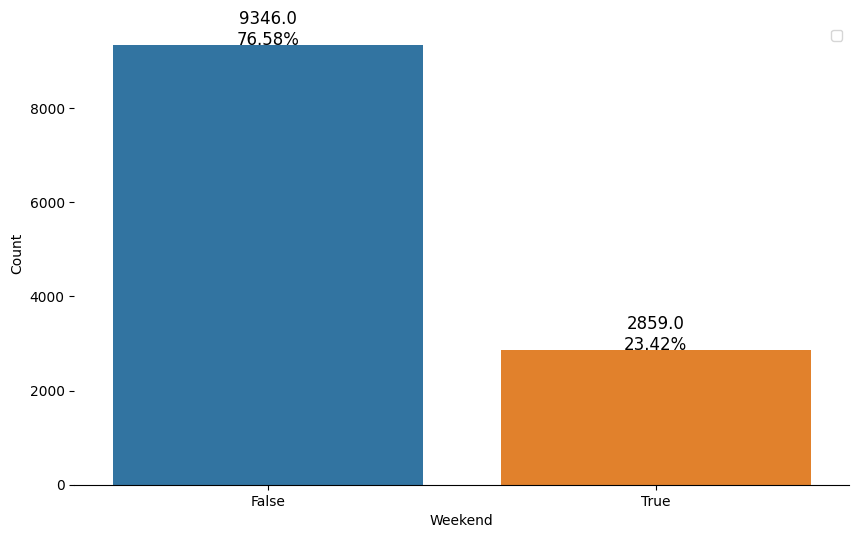

In [23]:
plot_categorical_data(df, 'Weekend')

**Less people visit this site during weekdays than weekends**

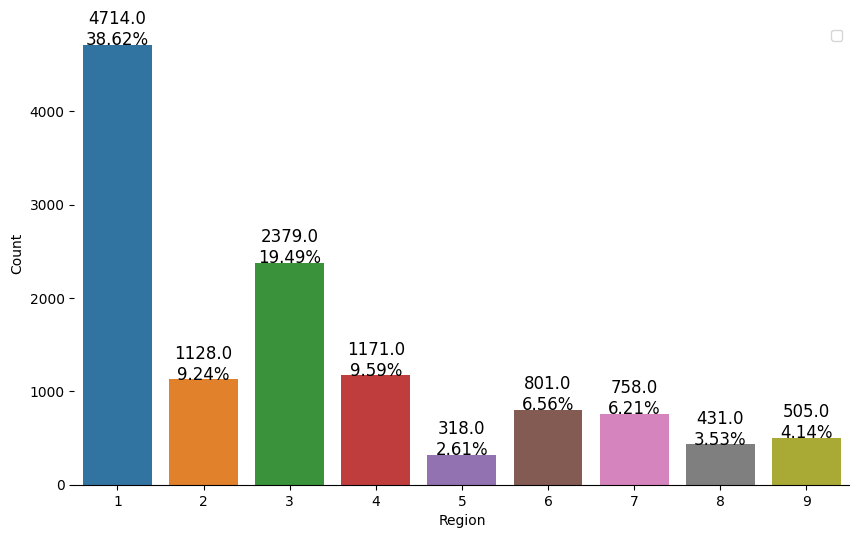

In [24]:
plot_categorical_data(df, 'Region')


Close to 39% of visitors come from region 1 followed by 19.5% from region 3

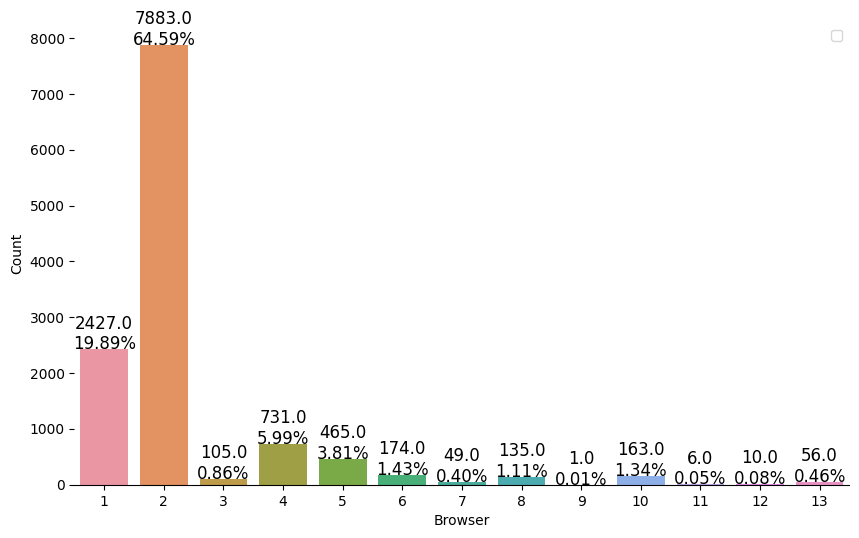

In [25]:
plot_categorical_data(df, 'Browser')

64.5% percent of visitors are coming from browser 2 followed by 19.9% from browser 1.

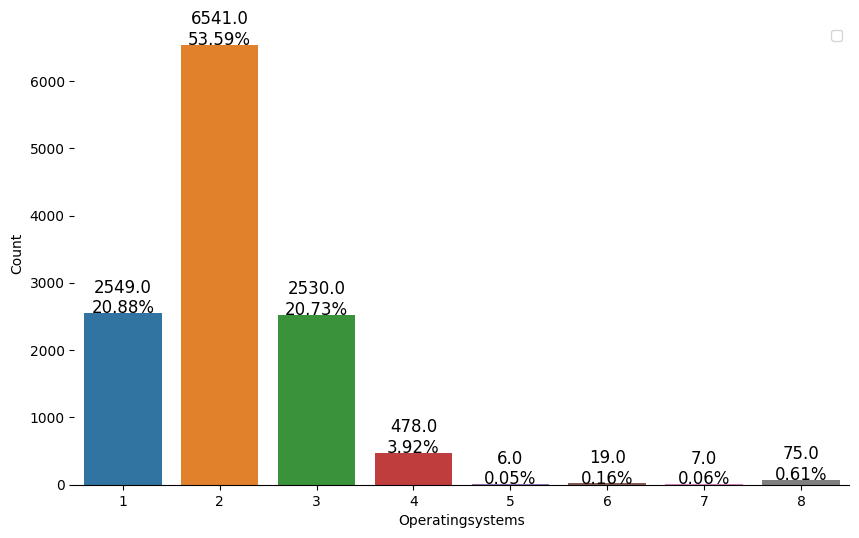

In [26]:
plot_categorical_data(df, 'OperatingSystems')

* More than 50% of people visiting the site are using operating system 2.
* Around 95% of people visiting are coming from major three operating systems - os 2 (53.5%), os 1 (21%), os 3 (21%)


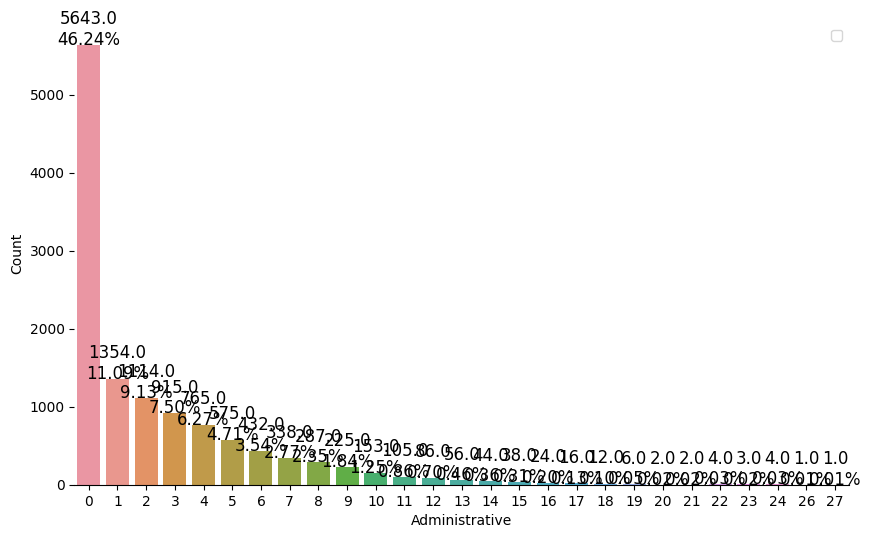

In [27]:
plot_categorical_data(df, 'Administrative')

* users tend to visit page 0 the most often.

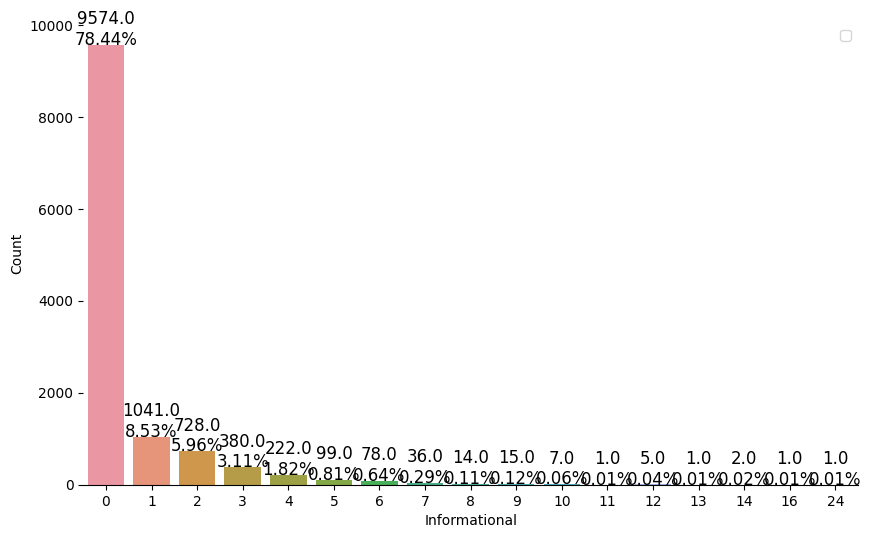

In [28]:
plot_categorical_data(df, 'Informational')

we can see that Information page 0 has the highest number of visitors.

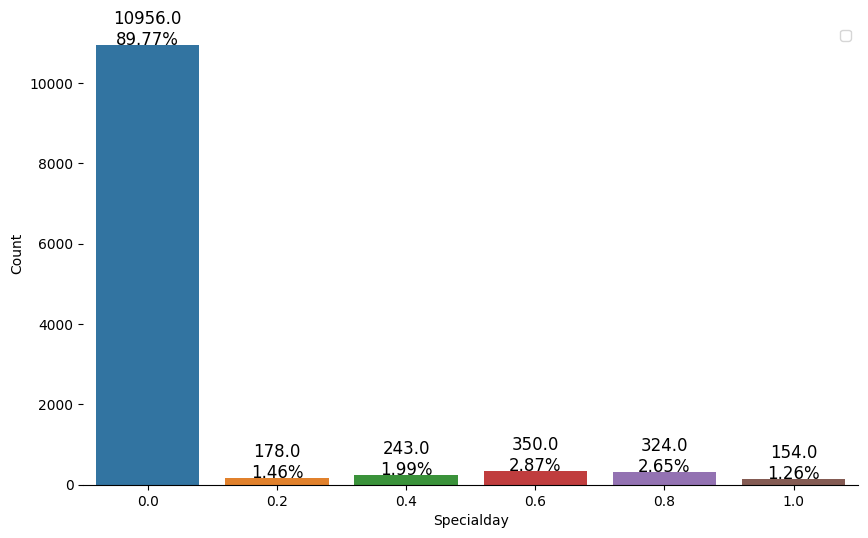

In [29]:
plot_categorical_data(df, 'SpecialDay')

we can see that special days (e.g. public holidays) have no impact on the number of visitors to our website.

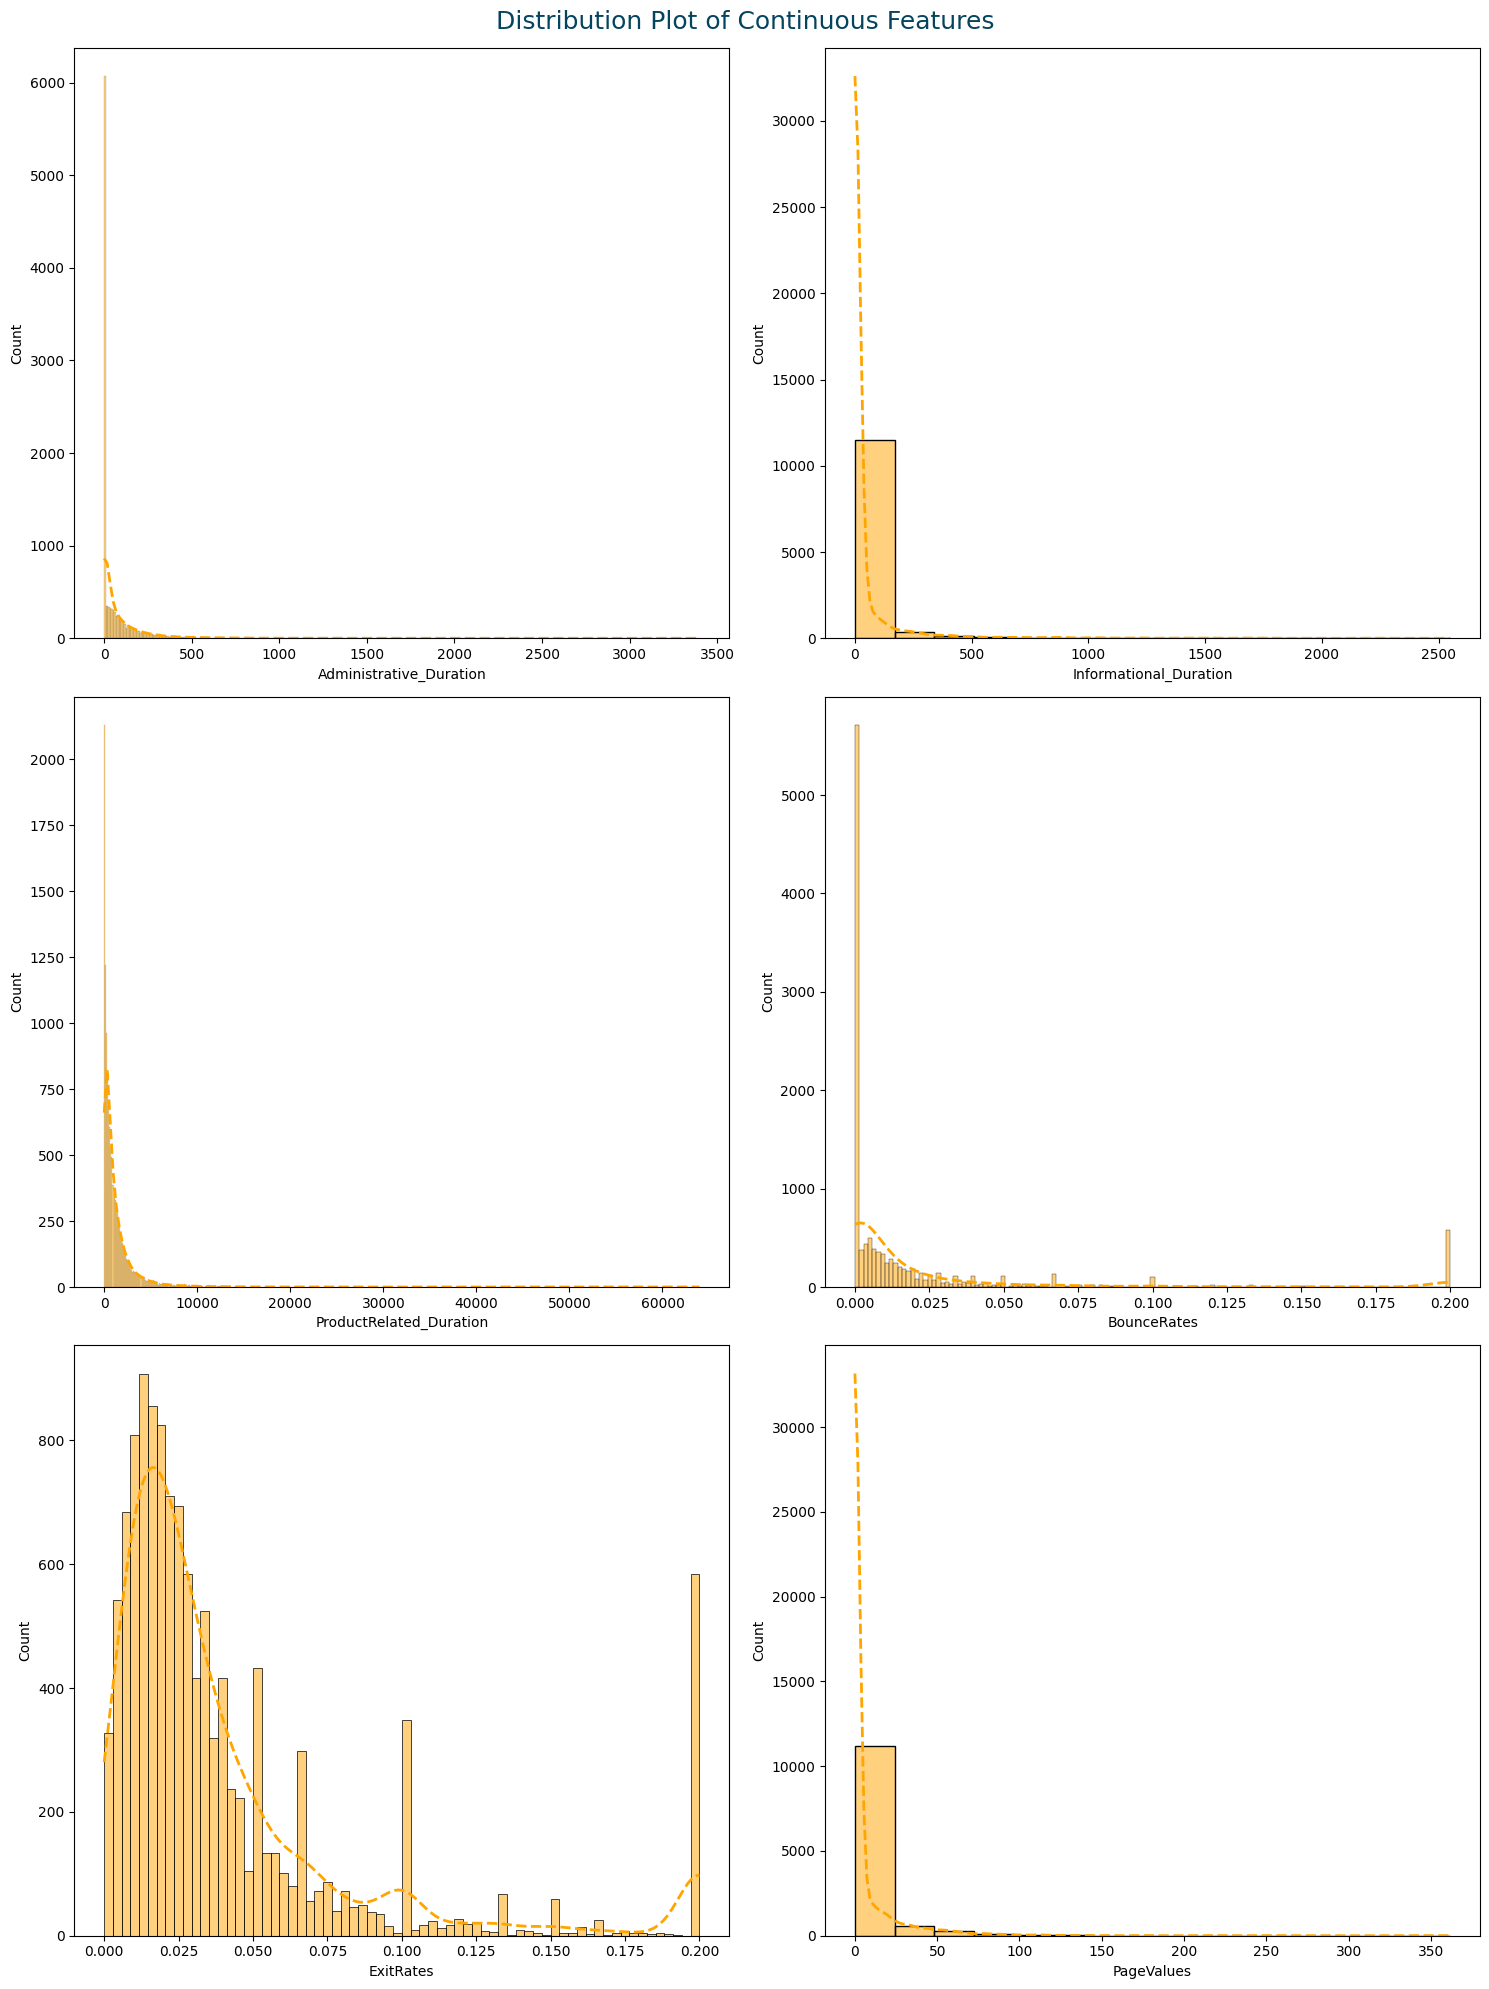

In [30]:
continuous_features = ['Administrative_Duration', 
                       'Informational_Duration', 
                       'ProductRelated_Duration', 
                       'BounceRates', 
                       'ExitRates', 
                       'PageValues']

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,20))
axs = np.ravel(axs)
for i, col in enumerate(continuous_features):
    plt.sca(axs[i])
    sns.histplot(data=df, x=col, kde=True, line_kws={'lw':2, 'ls':'--'}, color='orange')

plt.suptitle("Distribution Plot of Continuous Features", fontsize=18, color='#05445E', va='bottom')
plt.tight_layout()
plt.show()

**PART II**

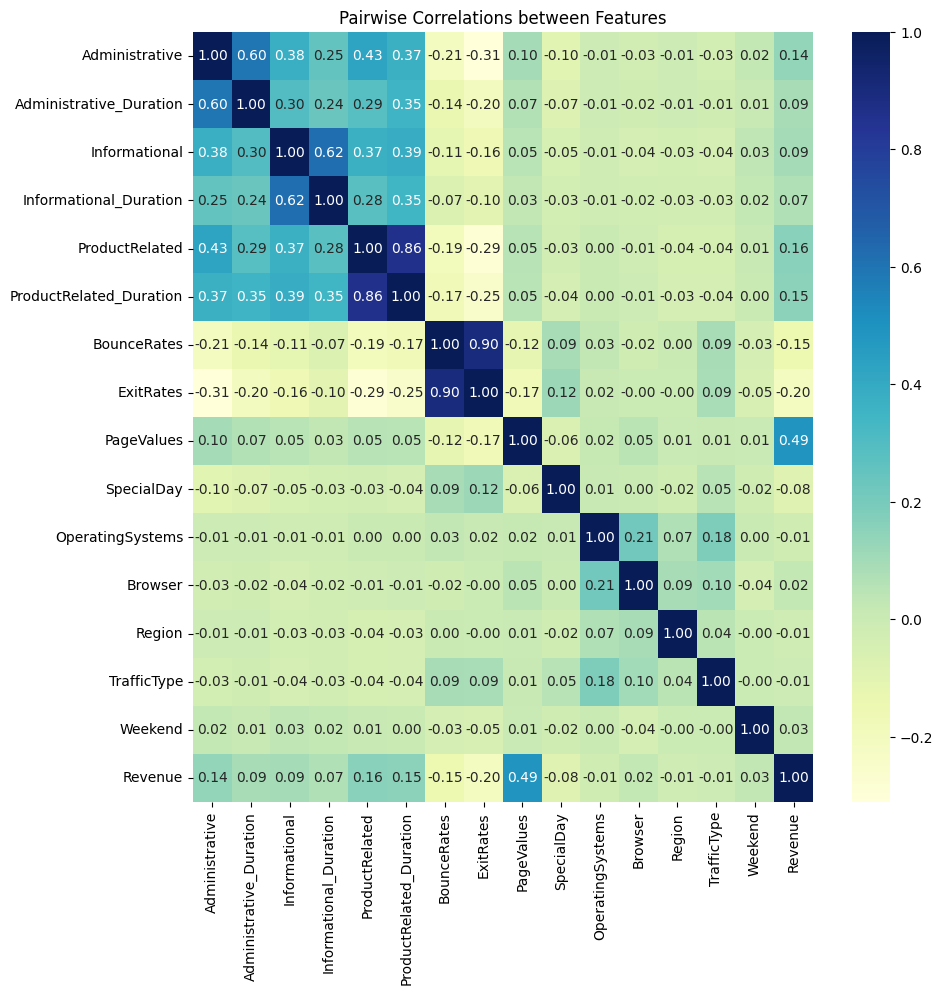

In [31]:
corr = df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Pairwise Correlations between Features")
plt.show()


**MULTIVARIATE ANALYSIS**

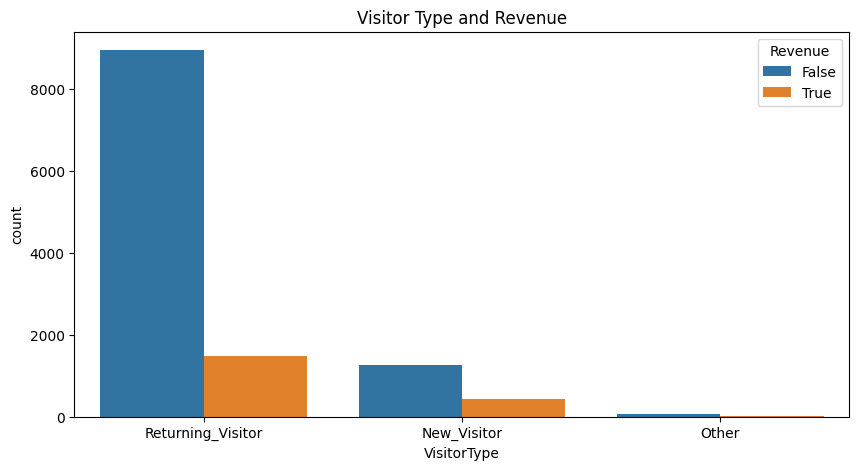

In [32]:
# Create two reporting quality visuals demonstrating key findings
plt.figure(figsize=(10, 5))
sns.countplot(x='VisitorType', hue='Revenue', data=df)
plt.title("Visitor Type and Revenue")
plt.show()

The returning visitors seem to make more purchases that new visitors 

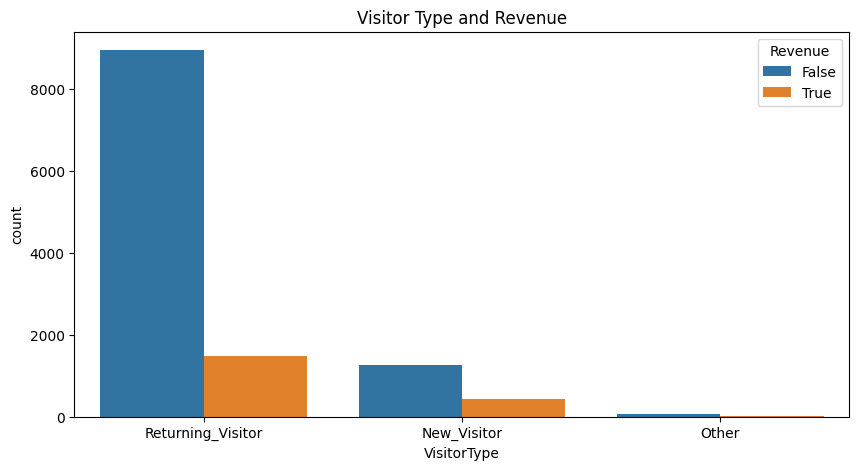

In [33]:
# Create two reporting quality visuals demonstrating key findings
plt.figure(figsize=(10, 5))
sns.countplot(x='VisitorType', hue='Revenue', data=df)
plt.title("Visitor Type and Revenue")
plt.show()

The highest number of Visitors are in May but the Highest number of sales are in November. this shows that the Amount of revenue might not be so much onfluenced by the number of visitors however much May might have seen the second highest number of sales probably as a result of the high number of visitors

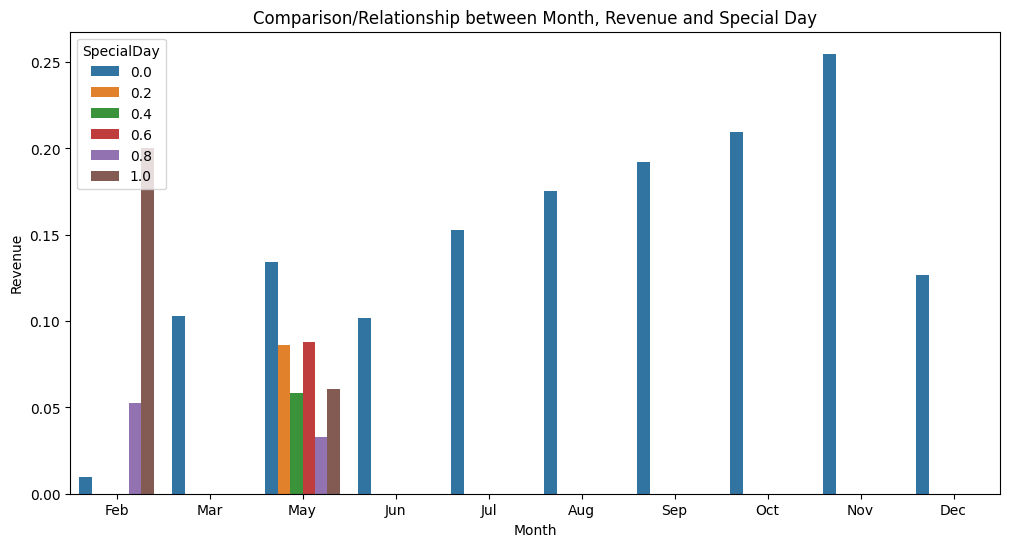

In [34]:
import calendar

# create a dictionary to map month abbreviations to their corresponding numerical values
month_dict = {month: index for index, month in enumerate(calendar.month_abbr) if month}

# create a bar plot to compare month, revenue and special days
plt.figure(figsize=(12, 6))
sns.barplot(x="Month", y="Revenue", hue="SpecialDay", data=df, order=sorted(df['Month'].unique(), key=lambda x: month_dict[x]), errorbar=None)
plt.title("Comparison/Relationship between Month, Revenue and Special Day")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


Certain months, such as November and October, appear to have higher sales than other months. This suggests that timing marketing and promotional efforts around these months could be effective in driving sales.

Visitors who visit the website on special days, such as Valentine's Day or Mother's Day, are more likely to make a purchase. This indicates that creating targeted campaigns and promotions around these special days could lead to increased sales.

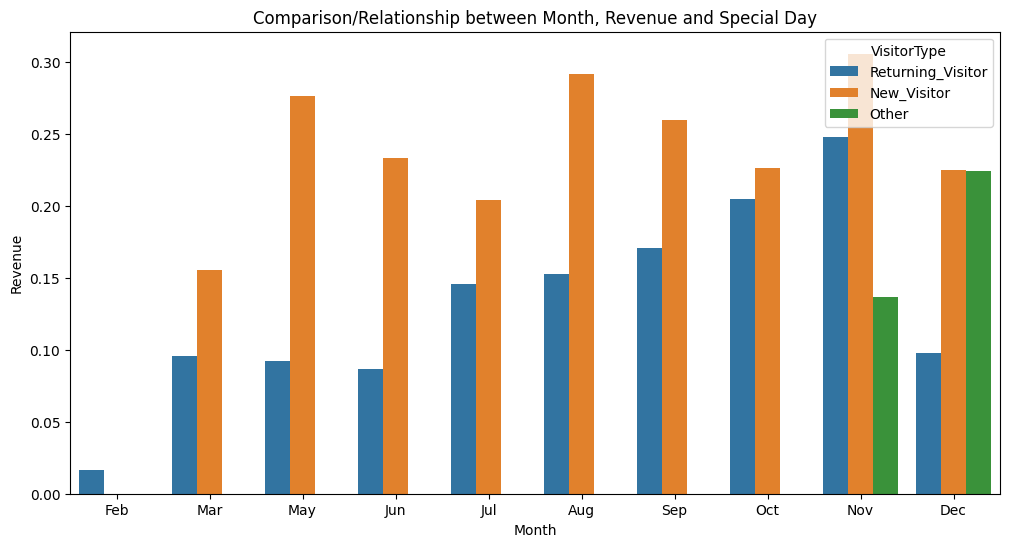

In [35]:
# import calendar

# create a dictionary to map month abbreviations to their corresponding numerical values
month_dict = {month: index for index, month in enumerate(calendar.month_abbr) if month}

# create a bar plot to compare month, revenue and special days
plt.figure(figsize=(12, 6))
sns.barplot(x="Month", y="Revenue", hue="VisitorType", data=df, order=sorted(df['Month'].unique(), key=lambda x: month_dict[x]), errorbar=None)
plt.title("Comparison/Relationship between Month, Revenue and Special Day")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


In [36]:
# compute pairwise correlation of columns
corr_matrix = df.corr()


In [37]:
# Display the correlations between the target and other features
target_corr = corr_matrix['Revenue'].sort_values(ascending=False)
print(target_corr)

Revenue                    1.000000
PageValues                 0.491894
ProductRelated             0.156042
ProductRelated_Duration    0.150077
Administrative             0.136330
Informational              0.093626
Administrative_Duration    0.091768
Informational_Duration     0.069358
Weekend                    0.027729
Browser                    0.024052
TrafficType               -0.005618
Region                    -0.012725
OperatingSystems          -0.014927
SpecialDay                -0.083601
BounceRates               -0.145091
ExitRates                 -0.204320
Name: Revenue, dtype: float64


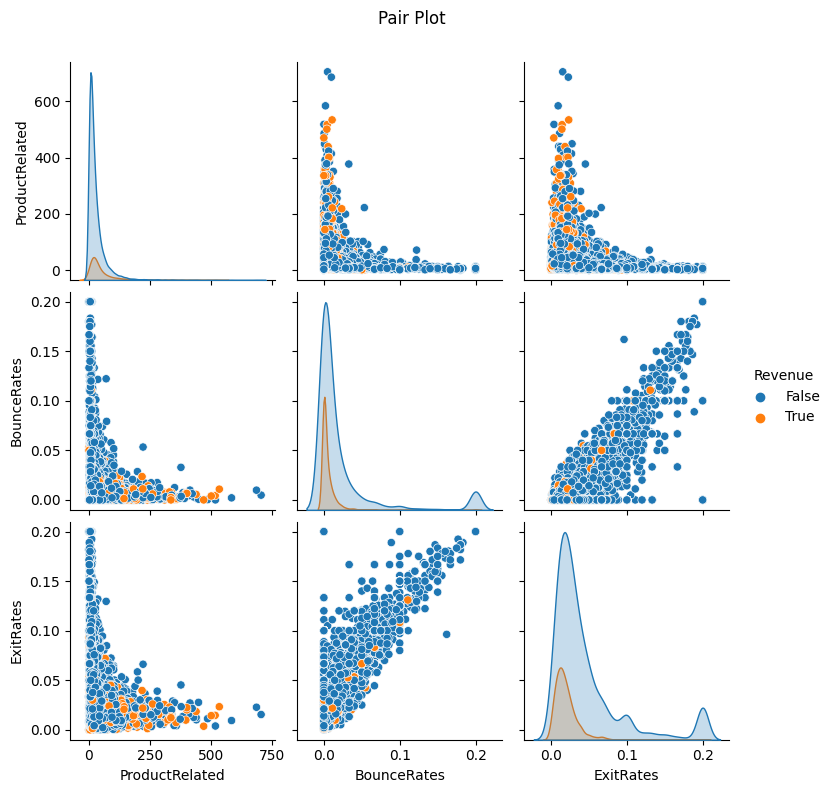

In [38]:
sns.pairplot(df, vars=['ProductRelated', 'BounceRates', 'ExitRates'], hue='Revenue')
plt.suptitle('Pair Plot', y=1.05)
plt.show()

This pair plot displays the relationships between ProductRelated, BounceRates, and ExitRates, and how they relate to our target (Revenue). By using different colors to indicate whether the target is True or False, we can see how each feature is related to our target.

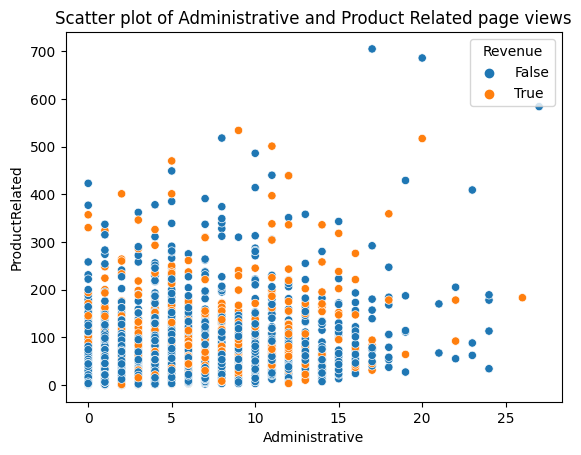

In [39]:
sns.scatterplot(data=df, x='Administrative', y='ProductRelated', hue='Revenue')
plt.title('Scatter plot of Administrative and Product Related page views')
plt.show()


In [42]:
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

# 
# Load libraries
# import pandas as pd
# from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [43]:
# Perform one-hot encoding on categorical variables
df = pd.get_dummies(df)

# Split data into training and testing sets
X = df.drop('Revenue', axis=1)
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [44]:
importances = clf.feature_importances_


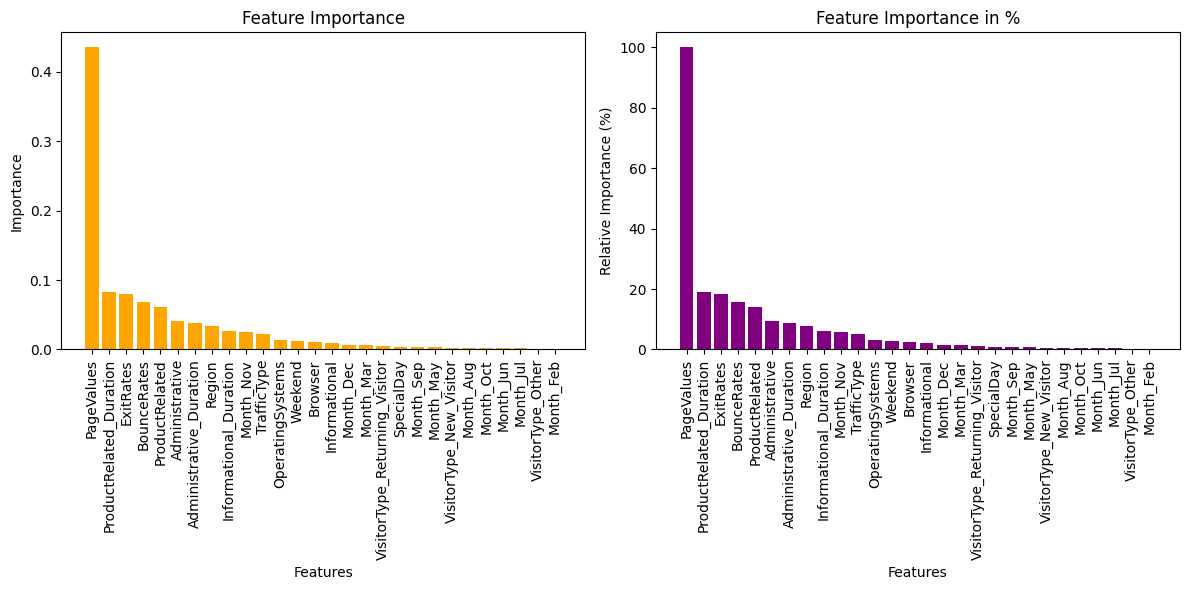

In [45]:
# determine which features are more important than others when assessing the revenue/target

indices = np.argsort(importances)[::-1]
names = [X_train.columns[i] for i in indices]

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: Feature importance as raw values
ax1.set_title("Feature Importance")
ax1.bar(range(X_train.shape[1]), importances[indices],color='orange')
ax1.set_xticks(range(X_train.shape[1]))
ax1.set_xticklabels(names, rotation=90)
ax1.set_xlabel('Features')
ax1.set_ylabel('Importance')

# Second subplot: Feature importance as percentages
importances_perc = 100.0 * (importances / importances.max())
ax2.set_title("Feature Importance in %")
ax2.bar(range(X_train.shape[1]), importances_perc[indices],color='purple')
ax2.set_xticks(range(X_train.shape[1]))
ax2.set_xticklabels(names, rotation=90,)
ax2.set_xlabel('Features')
ax2.set_ylabel('Relative Importance (%)')

plt.tight_layout()
plt.show()

Feature importance is a technique used in machine learning to identify the most important features that contribute to a model's performance in predicting a target variable. This is done by calculating the impact or contribution of each feature towards predicting the target variable. 

The feature importance values can then be ranked to identify the most important features that should be given more attention when making predictions. The higher the feature importance value, the more important the feature is in predicting the target variable. This technique helps to understand which features have the strongest impact on the target variable and can be used to guide feature selection and model optimization.

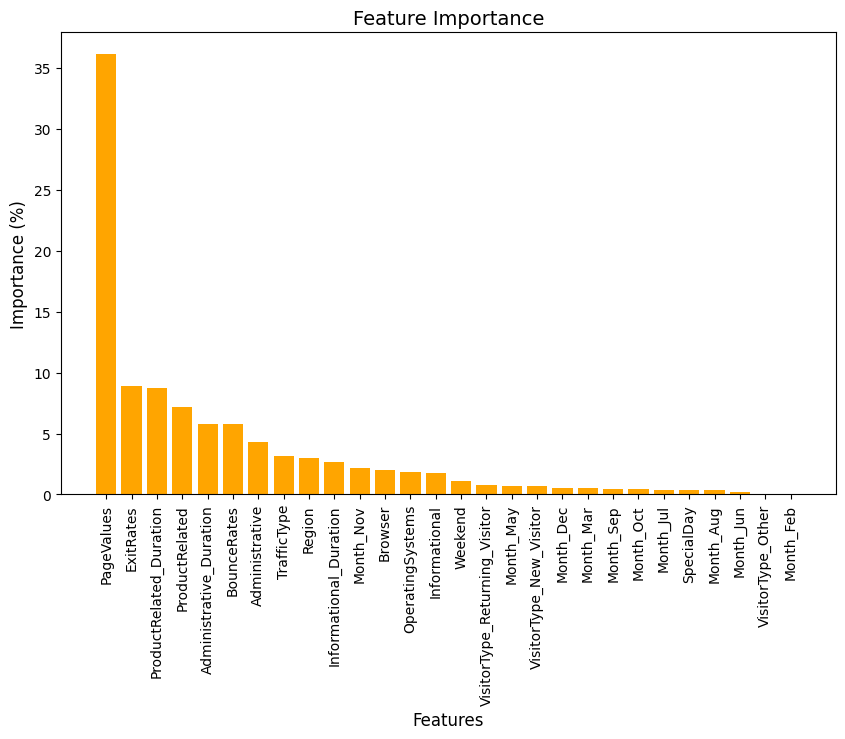

In [46]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Rank feature importance
importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
importances.sort_values('Importance', ascending=False, inplace=True)

# Calculate feature importance percentages
importances['Importance_perc'] = (importances['Importance'] / importances['Importance'].sum()) * 100

# Plot feature importance as a bar graph
plt.figure(figsize=(10, 6))
plt.bar(importances['Feature'], importances['Importance_perc'], color='#FFA500')
plt.xticks(rotation=90)
plt.title('Feature Importance', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance (%)', fontsize=12)
plt.show()


In [47]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(df)



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


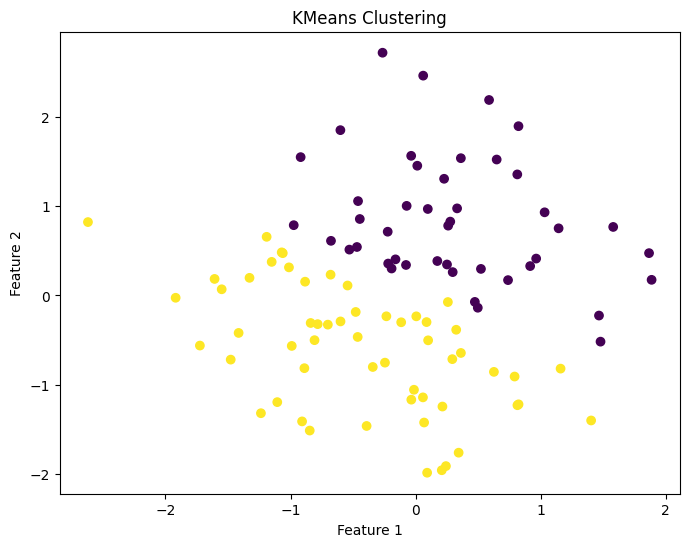

In [49]:
# 
from sklearn.cluster import KMeans

# Generate random data
np.random.seed(42)
X = np.random.randn(100, 2)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [50]:
# Instantiate KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


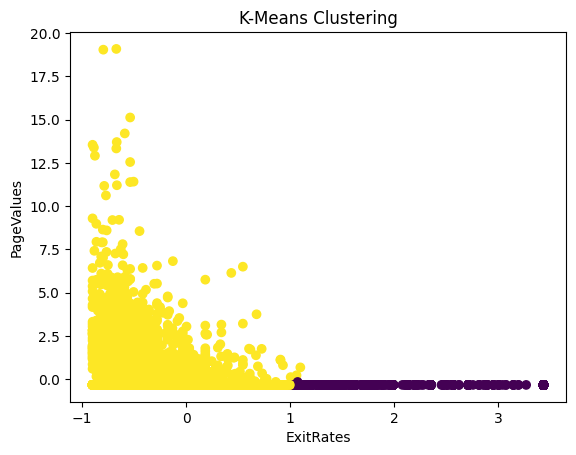

In [71]:
# Select the columns of interest
cols = [ 'ExitRates', 'PageValues']
data = df[cols]

# Normalize the data
data = (data - data.mean()) / data.std()

# Cluster the data using k-means
kmeans = KMeans(n_clusters=2, random_state=42).fit(data)

# Visualize the clusters
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=kmeans.labels_)
plt.xlabel(cols[0])
plt.ylabel(cols[1])
plt.title('K-Means Clustering')
plt.show()

this can help stakeholders know whether it amount of time spent on a page is influenced by the User Interface

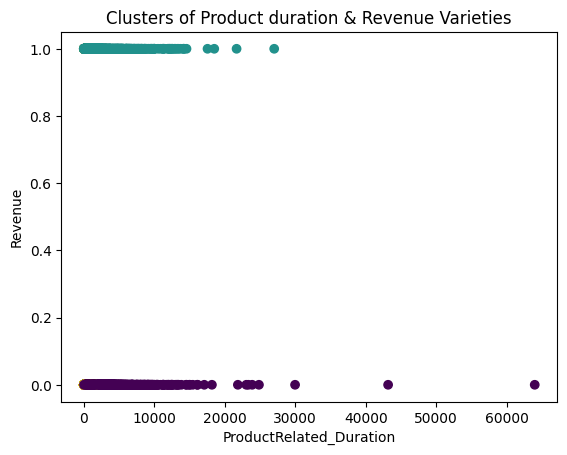

In [67]:
# Save the cluster labels to the dataframe 
df['cluster'] = kmeans.labels_
# Visualize the clusters
plt.scatter(df['ProductRelated_Duration'], df['Revenue'], c = df['cluster'])
plt.xlabel('ProductRelated_Duration')
plt.ylabel('Revenue')
plt.title('Clusters of Product duration & Revenue Varieties');
